In [20]:
import cv2
from matplotlib import pyplot as plt

In [18]:
# Specific colors from Image
################################
Red     -> red_plane - gray
Green   -> green_plane - gray
Blue    ->blue_plane - gray
Cyan    -> gray - red_plane
Magenta -> gray - green_plane
Yellow  -> gray - blue_plane

SyntaxError: invalid syntax (3721853699.py, line 3)

In [13]:
img = cv2.imread('robot2.jpg')
img.shape

(1390, 1300, 3)

In [12]:
img[:,:,-1].shape

(1390, 1300)

In [38]:
img = cv2.imread('img.jpeg')
img.shape

(837, 1600, 3)

(837, 1600)
(837, 1600)


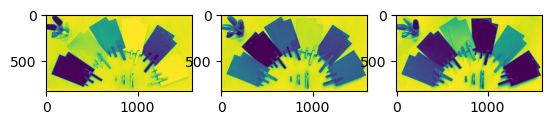

In [55]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
red_plane = img[:,:,-1].copy()
green_plane = img[:,:,-2].copy()
blue_plane = img[:,:,-3].copy()
print(blue_plane.shape)
print(gray.shape)

plt.subplot(1,3,1)
plt.imshow(red_plane)
plt.subplot(1,3,2)
plt.imshow(green_plane)
plt.subplot(1,3,3)
plt.imshow(blue_plane)




In [45]:
# red_color = cv2.subtract(red_plane, gray)
# red_color = cv2.subtract(green_plane, gray)
# red_color = cv2.subtract(blue_plane, gray)
# red_color = cv2.subtract(gray, blue_plane)
# red_color = cv2.subtract(gray, blue_plane)
# red_color = cv2.subtract(gray, red_plane)
yellow_color = cv2.subtract(gray, blue_plane)


In [31]:
def imshow(im,title, type='',):
    if type:
        plt.imshow(im, cmap=type)
    else:
        plt.imshow(im)
    plt.title(title)
    plt.axis('off')

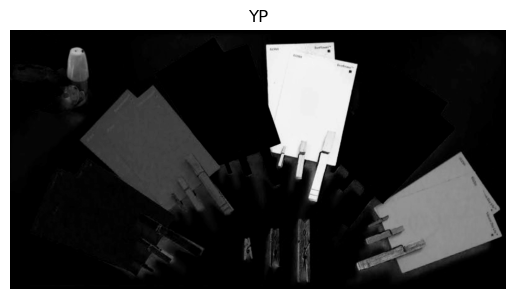

In [46]:
# plt.figure(figsize=(18,5))
# plt.subplot(2,4,1); imshow(img[:,:,::-1],'Original')
# plt.subplot(2,4,2); imshow(gray, 'Gray', 'gray')
# plt.subplot(2,4,4); imshow(red_plane, 'RP', 'gray')
# plt.subplot(2,4,4); imshow(green_plane, 'GP', 'gray')
# plt.subplot(2,4,5); imshow(blue_plane, 'BP', 'gray')
# plt.subplot(2,4,1); imshow(img[:,:,::-1],'Original')
# plt.subplot(2,4,2); imshow(gray, 'Gray', 'gray')
# plt.subplot(2,4,4); imshow(red_plane, 'RP', 'gray')
# plt.subplot(2,4,4); imshow(green_plane, 'GP', 'gray')
# plt.subplot(2,4,5); imshow(blue_plane, 'BP', 'gray')
# plt.show()

imshow(yellow_color, 'YP', 'gray')


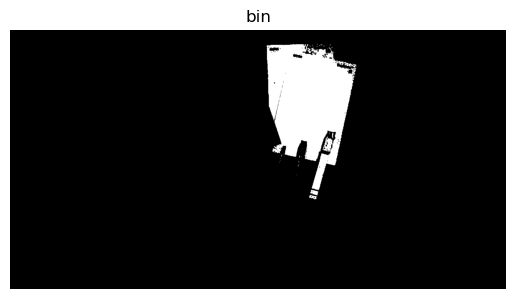

In [79]:
th, y_bw = cv2.threshold(yellow_color, 200, 255, cv2.THRESH_BINARY)
imshow(y_bw, 'bin', 'gray')

In [80]:
import skimage as ski

In [81]:
rp = ski.measure.regionprops(y_bw)
len(rp)

1

In [86]:
rp0 = rp[0]
y1, x1, y2, x2 = rp0.bbox          # y1,x1,y2,x2

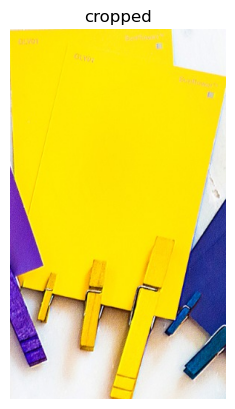

In [87]:
img_cropped = img[y1:y2, x1:x2, :].copy()
imshow(img_cropped[:,:,::-1], 'cropped')

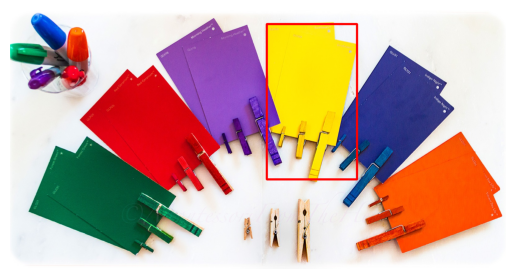

In [91]:
img_copy = img.copy()
cv2.rectangle(img_copy, (x1,y1), (x2,y2),color=[0,0,255], thickness=5)
imshow(img_copy[:,:,::-1], '')